### Author: Shu Liu 
#### Email: shutel@hotmail.com

# Part 1 - Keep Learning

### 1. Five exciting data science websites

**1) Kaggle Competition Past Solutions from Top Rankers: http://www.chioka.in/kaggle-competition-solutions/**  
Why I recommand: Learning from experts' code is always a good way to imporve yourself.

**2) COURSERA courses 'Machine Learning Specialization': https://www.coursera.org/specializations/machine-learning**  
Why I recommand: My favorite part of this specailization is the assignments. The assignments definitely help you understand how to code the regression, classification and clustering models from scratch instead of just using the functions from scikit-learn. (You can also check my completed coding of those assignmens here: https://github.com/shuHelicopter/Machine_Learning_Specialization_University_of_Washington). By the way, the instructors of these four courses are a talented couple, Carlos and Emily.

**3) R for Data Science: http://r4ds.had.co.nz**  
Why I recommand: I also code in R besides Python. R and Python have own advantages over each other. R specializes in data visualization, exploratory data analysis, and statistical learning. Python has obvious advantages in developing and optimizing machine learning models, deep learning, and interaction with other platforms.

**4) Data Science Course by Harvard University: http://cs109.github.io/2015/pages/videos.html**  
Why I recommand: This course is great introduction to data science. It covers web scraping, statistical analysis, machine learning, and natural language processing. It's One of best coursers I have ever seen.

**5) A gallery of interesting Jupyter Notebooks: https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks**  
Why I recommand: You can find a great number of coding examples here. This is a treasury!

### 2. Three amazing papers

**1) XGboost by Tianqi Chen and Tong He: 'Higgs Boson Discovery with Boosted Trees'**  
Why I recommand: XGboost is the most popular model in Kaggle competitions because of its high efficiency and accruacy. This model helps lots of competitors rank on the top list easily. This paper explains the algorithms and applications of XGboost in a clear format and why it trumps other machine learning methods. Tianqi Chen is the author of XGboos algorithm, and Tong He is author of 'xgboost' R package.

**2) Cross-Validation and Overfitting by Andrew Y. Ng: 'Preventing 'Overfitting' of Cross-Validation Data'**  
**3) Latent Dirichlet Allocation Model by Andrew Y.Ng: 'Latent Dirichlet Allocation'**  
Why I recommand: The above two papers are wrote by, Andrew Ng, the big boss in machine learning. Overfittiing is very comman in data modeling, and cross-validation is the way to solve it. LDA is an unsupervised learning topic model which can extract invaluable insights from text data.

Papers are in the 'Papers' file.

### 3. The Data Science Book

** 1)'An Introduction to Statistical Learning'** by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.  
I'd also introduce another two excellent books:  
** 2) 'The Elements of Statistical Learning: Data Mining, Inference, and Prediction'** by Hastie, Trevor, Tibshirani, Robert, Friedman, Jerome  
** 3) 'Python Machine Learning'** by Sebastian Raschka  

The book 1 and book 2 explain machine learning models from a mathematical persepctive. The book 3 focuses more on how to practically implement machine learning methods in Python. The book 2 is most time-consuming, becasue it has lots of detailed formulas and mathematical theories. I love book 1 most because its great balance between coding and model alogrithms. For book 2 and book 2, they are on the top of my reading list.  
Moreover, the 'Machine Learning Specialization' courses on COURSERA are as great as the above books.

# Part 2 - Exploratory Data Analysis

Connect to the database:

In [7]:
conn  = psycopg2.connect(database = 'postgres', 
                        user = '***', 
                        password = '******', 
                        host = '*****compute.amazonaws.com', 
                        port = '****')
print "Open database successfully"

Open database successfully


In [9]:
cursor = conn.cursor()
cursor.execute('SELECT id,bedrooms, bathrooms, city, country, \
               is_location_exact, lat, lng, price, description, \
               picture_urls, picture_captions, star_rating, \
               recent_review FROM public.case_study_data_short_term_rentals')
rows = cursor.fetchall()
conn.close()

In [3]:
import psycopg2 # connect to the database
import pandas as pd # data manipulation
import numpy as np # matrix operation
import math # mathematical calcualtion

Create the dataframe:

In [4]:
labels = ['id', 'bedrooms', 'bathrooms', 'city', 'country', \
          'is_location_exact', 'lat', 'lng', 'price', 'description', \
          'picture_urls', 'picture_captions', 'star_rating', \
          'recent_review']

In [5]:
rentals = pd.DataFrame.from_records(rows, columns = labels)

NameError: name 'rows' is not defined

Save the dataframe to local files:

In [29]:
# rentals.to_csv('rentals.csv') # save the intermediate data table

Read the local files:

In [6]:
# rentals = pd.read_csv('rentals.csv', index_col = 0) # read the intermediate data table

In [7]:
rentals.head()

,id,bedrooms,bathrooms,city,country,is_location_exact,lat,lng,price,description,picture_urls,picture_captions,star_rating,recent_review
0,13050007,1,1.0,Vannes,France,True,47.6572,-2.76339,46,-1,[u'https://a0.muscache.com/im/pictures/d9ff813...,"[u'', u'', u'', u'', u'', u'']",4.5,"{u'review': {u'listing_id': 13050007, u'review..."
1,13050008,1,1.0,Pleyben,France,True,48.1947,-3.98124,76,-1,[u'https://a0.muscache.com/im/pictures/7214c19...,[u''],-1.0,-1
2,13050011,1,1.5,Buffels Bay,South Africa,False,-34.0351,22.94220,28,"My place is good for couples, solo adventurers...",[u'https://a0.muscache.com/im/pictures/2d87bc1...,"[u'Double room: this room can sleep 3 guests',...",-1.0,-1
3,13050014,2,1.5,Budapest,Hungary,True,47.4932,19.05360,31,-1,[u'https://a0.muscache.com/im/pictures/75a6b89...,"[u'', u'', u'', u'', u'', u'', u'', u'', u'Vie...",-1.0,"{u'review': {u'listing_id': 13050014, u'review..."
4,13050019,2,1.0,Hannover,Germany,True,52.3669,9.75010,131,-1,[u'https://a0.muscache.com/im/pictures/1d9b08c...,"[u'E\xdfecke in der K\xfcche', u'', u'Doppelbe...",-1.0,-1


In [20]:
rentals.shape

(919, 14)

### Q1: How many listings are unique? (Filter out duplicates if any)

In [21]:
unique_rentals = rentals.drop_duplicates()

In [22]:
unique_rentals.shape

(919, 14)

It seems that this dataset has no duplicates. What if we drop the column 'id'?

In [23]:
rentals_noid = rentals.drop(['id'], axis = 1)

In [24]:
unique_rentals_noid = rentals_noid.drop_duplicates()
unique_rentals_noid.shape

(919, 13)

Nothing change, so there is no duplicates in this dataset.

### Q2: What country has the highest median price for a one bedroom?

In [12]:
rentals['price_bedroom'] = rentals['price'] / rentals['bedrooms']

In [13]:
rentals[rentals['bedrooms'] == 0].shape

(52, 15)

52 listings has 0 bedroom, which will give an 'inf' value in 'price_bedroom'. To understand the influence of 'inf' value in our anlaysis, we rank the median price per bedroom with both 0-filtered and non-filterted datasets.

Non-fitlerted dataset:

In [15]:
rentals.groupby(['country'])[['price_bedroom']].median().sort('price_bedroom', ascending = False).head()

/Users/shute/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,price_bedroom
country,
Georgia,inf
-1,256.000000
Bermuda,240.000000
United Arab Emirates,112.500000
Panama,110.000000


Filtered dataset (without 0 bedroom):

In [28]:
rentals[rentals['bedrooms'] != 0].groupby(['country'])[['price_bedroom']].median().sort('price_bedroom', ascending = False).head()

/Users/shute/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,price_bedroom
country,
-1,256.000000
Bermuda,240.000000
Panama,110.000000
United Arab Emirates,97.916667
Dominican Republic,95.000000


Based on the above results, we conclude 'Bermuda' has the highest median price '240.0' for a one bedroom. There is no information of '-1' value in the dataset, but we believe this may be a symbol of missing value or wrong data.

### Q3: Find two unique listings that have the shortest distance (euclidean distance / orthodromic distance)

1) Calculate Eucildean Distance:  dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))  
We don't need to normalize the data because they are on the same scale here.

In [29]:
rentals[['id', 'lat', 'lng']].head()

,id,lat,lng
0,13050007,47.6572,-2.76339
1,13050008,48.1947,-3.98124
2,13050011,-34.0351,22.94220
3,13050014,47.4932,19.05360
4,13050019,52.3669,9.75010


In [30]:
def euclid_dist(lat1, lon1, lat2, lon2):
    dist = np.sqrt((lon1 - lon2)**2 + (lat1 - lat2)**2)
    return dist

2) Calculate Orthodromic Distance: (Haversine Formula)  
· londelta = lon2 - lon1  
· latdelta = lat2 - lat1  
· a = (sin(latdelta/2))^2 + cos(lat1) cos(lat2) (sin(londelta/2))^2  
· c = 2 atan2( sqrt(a), sqrt(1-a) )  
· d = R * c (where R is the radius of the Earth)  

In [31]:
def orthod_dist(lat1, lon1, lat2, lon2):
    r = 6371.009 # radius in 'KM' 
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    londelta = lon2 - lon1
    latdelta = lat2- lat1
    a = math.pow(math.sin(latdelta/float(2)), 2) + math.cos(lat1) * math.cos(lat2) * math.pow(math.sin(londelta/float(2)), 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    return c * r

**Compute the shortest distance: **

In [34]:
def shortest_dist(data, metric = 'euclidean'):
    mindist = float('inf')
    index1 = []
    index2 = []
    dist = 0
    
    for i in range(0, len(data) - 1):
        lat1 = data.iloc[i]['lat']
        lng1 = data.iloc[i]['lng']
        for j in range(i + 1, len(data)):
            lat2 = data.iloc[j]['lat']
            lng2 = data.iloc[j]['lng']
        if metric == 'euclidean':
            dist = euclid_dist(lat1, lng1, lat2, lng2)
        elif metric == 'orthodromic':
            dist = orthod_dist(lat1, lng1, lat2, lng2)
            
        if dist < mindist:
            mindist = dist
            index1 = [i]
            index2 = [j]
        elif dist == mindist: # to save other points with the shortest distance
            index1.append(i)
            index2.append(j)
    return {'mindist': mindist,
            'index1': index1,
            'index2': index2}

(1) Eucildean Distance:

In [37]:
res1 = shortest_dist(rentals)
print res1['mindist']
print res1['index1']
print res1['index2']

0.15525733477
[865]
[918]


(2) Orthodromic Distance:

In [38]:
res2 = shortest_dist(rentals, metric = 'orthodromic')
print res2['mindist']
print res2['index1']
print res2['index2']

15.696634029
[865]
[918]


Implementing 'Orthodromic Distance' and 'Eucildean Distance' will give the same result. Listings '13052826' and '13052988' have the shortest euclidean distance (shown above).

Listing 1:

In [39]:
rentals.loc[res1['index1']]

,id,bedrooms,bathrooms,city,country,is_location_exact,lat,lng,price,description,picture_urls,picture_captions,star_rating,recent_review,price_bedroom
865,13052826,1,1.0,Piombino,Italy,False,42.9348,10.5188,33,Bright and large attic 10 min from the sea. Th...,[u'https://a0.muscache.com/im/pictures/db874ca...,"[u'', u'', u'', u'', u'', u'', u'', u'']",4.5,"{u'review': {u'listing_id': 13052826, u'review...",33.0


Listing 2:

In [40]:
rentals.loc[res1['index2']]

,id,bedrooms,bathrooms,city,country,is_location_exact,lat,lng,price,description,picture_urls,picture_captions,star_rating,recent_review,price_bedroom
918,13052988,1,1.0,Rio Marina,Italy,False,42.812,10.4238,60,Appartamento in villetta al primo piano con gr...,[u'https://a0.muscache.com/im/pictures/8672891...,"[u'', u'', u'', u'', u'', u'', u'']",-1.0,-1,60.0


### Q4: Visualize all US listings on a map

In [8]:
import plotly
from plotly.graph_objs import *
import matplotlib.pyplot as plt
%matplotlib inline

#### Plot an interactive map with ploty:

In [7]:
lons = rentals[rentals['country'] == 'United States']['lng'].values
lats = rentals[rentals['country'] == 'United States']['lat'].values
ids = rentals[rentals['country'] == 'United States']['id'].values

Get access to the interactive visualization package 'ploty' and 'mapbox':

In [9]:
plotly.tools.set_credentials_file(username = 'shuheicopter', api_key = 'y5fSij1Qi69qazJNJYpJ')
mapbox_access_token = 'pk.eyJ1Ijoic2h1aGVsaWNvcHRlciIsImEiOiJjajVoYnphcmoxMTlyMzZvMWZoczd1bm5hIn0.VlZsKHke_Tywbc_I8p_Hew'

Visualize the data points:

In [10]:
data = Data([
    Scattermapbox(
        lat = lats,
        lon = lons,
        mode = 'markers',
        marker = Marker(
                size = 9,
                color = 'red'
        ),
        text = ids,
    )
])
layout = Layout(
    autosize = True,
    hovermode = 'closest',
    mapbox= dict(
        accesstoken = mapbox_access_token,
        bearing = 0,
        center = dict( # set a center of the visualized 
            lat = 39.00,
            lon = -106.00
        ),
        pitch = 0,
        zoom = 3
    ),
)

fig = dict(data = data, layout = layout)
plotly.plotly.iplot(fig, filename = 'Rental Listings Map in US')

This is an interactive map. You can click on the points to check the listing id. Also, you can zoom out or zoom in to know more details about the apartment's surronding.

#### Plot a static map with Basemap: (An alternative)  
Installing tutorial is available here: https://matplotlib.org/basemap/users/installing.html

In [ ]:
from mpl_toolkits.basemap import Basemap

def geo_price(color, label):
    fig = plt.figure(figsize = (50,50))
    m = Basemap(projection = 'mill',\
                llcrnrlat = 23.288, urcrnrlat = 51.23,\
                llcrnrlon = -131.20,urcrnrlon = -67.219,\
                resolution = 'h')
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    m.drawmapboundary()
    m.fillcontinents(lake_color =' #FFFFFF')

    lon = lons
    lat = lats
    x, y = m(lon, lat)
    ax = fig.add_subplot(1,1,1)
    ax = m.plot(x, y, color, markersize = 20, alpha = 1, label = label)

    plt.title('Rental Listings Map in US')
    plt.legend(loc = 'upper left')
    plt.show()
    
geo_price('ro', 'low')

### Q5: Find out the total number of active listings

In [59]:
import requests # request from the sever 
import random # random number of seconds 
import time # the sleep time

The estimated average time is about 10 mins. To scrape data politely, I use a little bit longer time here bewteen two requests. In practice, this process really depends on the security policy of the target websites. If you want to make it faster, you can adjust the length of sleeping time and you could process the scraping through multiple IP agencies.

In [ ]:
active = [None] * len(rentals)
for i in xrange(len(rentals)):
    url = 'https://www.airbnb.com/rooms/' + str(rentals.iloc[i]['id'])
    
    # try not to be blocked by changing the sleep time 
    if i % 10 == 0:
        sleep_time = random.randint(1, 3) # random time between 1s and 3s 
    else:
        sleep_time = random.randint(1, 4) / float(10) # random time between 0.1s and 0.4s (0, 10)
    time.sleep(sleep_time)  # be nice when scraping
    
    resp = requests.get(url)
    if resp.status_code == 200 and resp.url == url:
        active[i] = True
    elif resp.status_code == 503: # intensive requests result in being blocked by the target website
        active[i] = None
        print 'The %d responses 503.' % i
    else:
        active[i] = False

In [840]:
rentals['active'] = active # add this new feature to the original dataframe

In [841]:
print 'The number of active listing now: ', sum(rentals['active'] == True)

The number of active listing now:  787


# Part 3 - Natural Language Processing

In [61]:
import re # regular expression for text analysis
import string # string operation for text analysis
from sklearn.feature_extraction.text import TfidfVectorizer # tfidf for natural language processing

Check te basic inforamtion of the dependent variable 'star_rating':

In [842]:
rentals['star_rating'].unique()

array([ 4.5, -1. ,  5. ,  3.5,  4. ,  2.5])

In [843]:
rentals['star_rating'].value_counts()

-1.0    524
 5.0    208
 4.5    158
 4.0     16
 3.5     12
 2.5      1
Name: star_rating, dtype: int64

To better implement the classification model, we bucket the 'star_rating'(0~5) into two rating levels, namely perfect (208) and Not Perfect (187) based on the distribution of rating value in this dataset. 'Perfect'is x = 5, and 'Not Perfect' is 0 <= x <= 4.5. Also, it can provide a balanced data in label 'star_rating'.  If we have a much larger dataset, we could choose different threshold value to bucket this feature. This step highly depends on the dataset we use in practice.  
  
In the feature 'star_rating', there is too much (524/920 ~= 56.96%) missing value. Missing value in dependent variable is most harmful to modeling. In general, we prefer deleting those observations. However, we use an alternative solution to deal with the missing value becasue its percentage is very high. We consider the missing value -1 in 'star_rating' as a new category.  

In [844]:
rentals['star_rating'] = rentals['star_rating'].apply(lambda x: 1 if x == 5 else 2 if x == -1 else 0)

### Features Engineering:

**1) Numerical Feature:** bedrooms, bathrooms, lat, lng, price, star_rating  
**2) Categorical Feature:** id, city, country, is_location_exact  
**3) Image Feature:** picture_urls  
**4) Text Feature:** description, picture_captions, recent_review  
  
'-1' in the dataset represents missing value.   

#### 1) Numerical features processing:

In [845]:
rentals['bedrooms'].value_counts()

1     448
2     237
3      99
4      57
0      52
5      19
6       5
10      1
8       1
Name: bedrooms, dtype: int64

Two new features for observations of no bedroom or too many bedrooms:

In [846]:
rentals['no_bedroom'] = rentals['bedrooms'].apply(lambda x: 1 if x == 0 else 0) 
rentals['more_than_5_bedroom'] = rentals['bedrooms'].apply(lambda x: 1 if x >= 5 else 0)

Denominator should not be 0, so we assign a small value to 0 in 'bedrooms' and 'bathrooms':

In [847]:
rentals['bedrooms'] = rentals['bedrooms'].apply(lambda x: 1 if x == 0 else x) # give 1 to 0 in bedroom
rentals['bathrooms'] = rentals['bathrooms'].apply(lambda x: 1 if x == 0 else x) # give 1 to 0 in bedroom

Price per bathroom:

In [849]:
rentals['price_bathroom'] = rentals['price'] / rentals['bathrooms']

Price per bedroom:

In [850]:
rentals['price_bedroom'] = rentals['price'] / rentals['bedrooms']

The ratio of bathroom to bedroom:

In [851]:
rentals['bath_bed_ratio'] = rentals['bathrooms'] / rentals['bedrooms']

#### 2) One hot encoding for categorical features:  
'is_location_exact' is converted to 0-1. 'city' and 'country' should be transformed into one hot. However, the sample dataset is very small and it can not provide enough information to explore influence of different cities, so we only transform 'country' with one hot encoding. The feature 'City' will not be used in this modeling.

In [853]:
rentals['is_location_exact'] = rentals['is_location_exact'].apply(lambda x: 1 if x else 0)

In [854]:
rentals['active'] = rentals['active'].apply(lambda x: 1 if x else 0)

In [855]:
country_new = pd.get_dummies(rentals['country'])
pd.concat([rentals, country_new], axis = 1).head()

,id,bedrooms,bathrooms,city,country,is_location_exact,lat,lng,price,description,...,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zimbabwe
0,13050007,1,1.0,Vannes,France,1,47.6572,-2.76339,46,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13050008,1,1.0,Pleyben,France,1,48.1947,-3.98124,76,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13050011,1,1.5,Buffels Bay,South Africa,0,-34.0351,22.94220,28,"My place is good for couples, solo adventurers...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13050014,2,1.5,Budapest,Hungary,1,47.4932,19.05360,31,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13050019,2,1.0,Hannover,Germany,1,52.3669,9.75010,131,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3) Image features engineering:

The number of pictures:

In [856]:
rentals['num_pics'] = rentals['picture_urls'].apply(lambda x: len(x.split(', '))) 

The number captions for pictures:

In [857]:
def num_nonempty(string): # the number of non-empty captions for pictures
    total_num = len(string.split('\', ')) # the total number of elements
    nonempty_num = len(re.findall('u\'\'', string)) # the number of non-empty elements
    return total_num - nonempty_num

In [858]:
rentals['num_pic_caps'] = rentals['picture_captions'].apply(lambda x: num_nonempty(x))

#### 4) Text features engineering:

Intuition tells us that 'recent_review' and 'description' play vital roles in 'star_rating'. However, lots of 'recent_review' and 'description' are in foreign language. 
  
Take the listing '13050007' as an example, it's in French, so it's meaningless to use English grammer to analyze it:  
'... dans le centre ville,proche du port,de la gare maritime et du centre historique ...'   
  
For example, the description of listing '13052988' is in Italian:  
'Appartamento in villetta al primo piano con grande terrazzo vista mare , camera con letto matrimoniale + lettino singolo apribile, soggiorno con divano letto matrimoniale e lettini singolo apribile. Cucina abitabile, posto auto ,'

Even though the language is not consistent in these two features, I implmented a general method to handle the data: **TF-IDF**. Comparing to the raw word count, we should focus more on rare words that don't happen in every text. TF-IDF (term frequency–inverse document frequency) is a good feature representation that penalizes words that are too common.

##### 4.1) Recent_review

'recent_review' has differents kinds of information about the review such as reviewer id, review id, comments, and created time. Therefore, I define the following function 'extract_info' to extract information separately in 'recent_review'. We need to know start and end keywords to locate the information we want to extract.

In [859]:
def extract_info(review, start_keywords, end_keywords):
    len_search = len(start_keywords) # length of the searching word
    start = review.find(start_keywords) + len_search # start index of comments
    end = review.find(end_keywords) # end index of comments
    return review[start:end]

Checkpoints  
Extract comments:

In [860]:
test_review = rentals.iloc[3]['recent_review']
comment_start_keywords = 'u\'comments\': u'
comment_end_keywords = ', u\'reviewer\':'
comment = extract_info(test_review, comment_start_keywords, comment_end_keywords)
print comment

"This flat is amazing. It's close to market and Vaci street, there are few supermarket nearby, plus Danube river is so near!!\nThe view from top floor is gorgeous, a functional kitchen and a big big shower. Everything is so nice=)"


Extract reviews created time:

In [861]:
time_start_keywords = 'u\'created_at\': u\''
time_end_keywords = '\', u\'comments\':'
lastest_com_time = extract_info(test_sentence, time_start_keywords, time_end_keywords)
print lastest_com_time

2017-04-30T06:45:50Z


**Extract information 'comments' and 'created_time': **

In [862]:
rentals['recent_comment'] = rentals['recent_review'].apply(lambda x: extract_info(x, comment_start_keywords, comment_end_keywords))[1:-1]
rentals['latest_com_time'] = rentals['recent_review'].apply(lambda x: extract_info(x, time_start_keywords, time_end_keywords))

First, remove punctuation of raw text:  

In [863]:
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(None, string.punctuation)
    else:
        return ''

In [864]:
review_text = rentals['recent_comment'].apply(lambda x: remove_punctuation(x))

In comments, there are some confusing words, such as '\xe6' ('\x..' is a 3-digit non-English word like German) and '\u34f3'('\u....' is a 5-digit Chinese word). This makes the natural language processing much more difficult. It's feasible to handle data like '\xe6', because they are space-sparated like English. However, as for Chinese word '\u34f3', they have no space between words, so it's very difficult to clean.

Second, Tf-idf for comments:

In [865]:
tfidf_rev = TfidfVectorizer(norm = 'l2',min_df = 0, use_idf = True, smooth_idf = False, sublinear_tf =True)  
review_fit = tfidf_rev.fit(review_text)  
review_transform = review_fit.transform(review_text)
tfidf = review_transform.toarray()

In [866]:
d = dict(zip(review_fit.vocabulary_.keys(), map(sum,zip(*tfidf))))
word_index = dict(zip(review_fit.vocabulary_.keys(), review_fit.vocabulary_.values()))

Get te top 100 words:

In [867]:
col = {}
top_100 = sorted(d.items(), lambda x, y: cmp(x[1], y[1]), reverse = True)[0:100]
for word in top_100:
    col[word[0] + '_tfidf'] = tfidf[:, word_index[word[0]]]

The final TFIDF vector of every comment as a dataframe:

In [868]:
col_df.shape

(919, 100)

In [869]:
col_df = pd.DataFrame(col)

##### 4.2) Description 

Check the total number of words of description. (This may reflect how much the host cares about this listing.)

In [870]:
rentals['num_desc_words'] = rentals['description'].apply(lambda x: len(x.split(' ')) if x != '-1' else 0)

Tf-idf for description, the method is same with 'comments':

In [871]:
des = rentals['description'].values
tfidfdesc = TfidfVectorizer(norm = 'l2',min_df = 0, use_idf = True, smooth_idf = False, sublinear_tf = True)  
review_fit_des = tfidfdesc.fit(des)  
review_transform_des = review_fit_des.transform(des)
tfidf_des = review_transform_des.toarray()

In [872]:
d_des = dict(zip(review_fit_des.vocabulary_.keys(), map(sum,zip(*tfidf_des))))
word_index_des = dict(zip(review_fit_des.vocabulary_.keys(), review_fit_des.vocabulary_.values()))
col_des = {}
top_100_des = sorted(d_des.items(), lambda x, y: cmp(x[1], y[1]), reverse=True)[0:100]
for word in top_100_des:
    col_des[word[0] + '_tfidf'] = tfidf_des[:, word_index_des[word[0]]]

The final TFIDF vector of every description as a dataframe:

In [873]:
col_df_des.shape

(919, 100)

In [874]:
col_df_des = pd.DataFrame(col_des) # the data

#### 5) Select final features for training and dealing with missing value:

Fill out missing value with np.nan except the label 'star_rating':

In [875]:
rentals_nan = rentals.replace(to_replace = ['-1'], value = np.nan)

Merge dataframes:

In [877]:
text_data = pd.concat([col_df, col_df_des], axis = 1)

In [878]:
text_data.shape

(919, 200)

In [879]:
final_data = pd.concat([rentals_nan, text_data], axis = 1)

Select features used in data modeling:

In [881]:
rm_features = ['city', 'country', 'description', 'picture_urls', 'picture_captions', 'recent_review', 'active', 'recent_comment', 'latest_com_time']
data_model = final_data.drop(rm_features, 1)

In [882]:
data_model.shape

(919, 216)

In [883]:
data_model.head()

,id,bedrooms,bathrooms,is_location_exact,lat,lng,price,no_bedroom,more_than_5_bedroom,price_bathroom,...,tranquility_tfidf,tuin_tfidf,vanaf_tfidf,vehicle_tfidf,walkers_tfidf,wardrobes_tfidf,waves_tfidf,wonderful_tfidf,woods_tfidf,writers_tfidf
0,13050007,1,1.0,1,47.6572,-2.76339,46,0,0,46.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13050008,1,1.0,1,48.1947,-3.98124,76,0,0,76.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13050011,1,1.5,0,-34.0351,22.94220,28,0,0,18.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13050014,2,1.5,1,47.4932,19.05360,31,0,0,20.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13050019,2,1.0,1,52.3669,9.75010,131,0,0,131.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [909]:
# data_model.to_csv('data_model.csv') # save the intermediate data table

### Data Modeling with XGboost Classification:

In practice, the right step to conduct data modeling is to split train and test datasets, adn then apply cross validation to train datasets to tune parameters and adjust the performance of models. Due to limited time and data, I directly use cross validation to split the dataset. We are most interested in the varaibles importance in the modeling process instead of the final performance of this simple model.

In [4]:
# data_model = pd.read_csv('data_model.csv', index_col = 0) # read the intermediate data table

In [ ]:
import sklearn.cross_validation as cv 
import xgboost as xgb

If you don't have 'xgboost' installed before, please check the install tutorials here: https://github.com/dmlc/xgboost/tree/master/python-package. It may take you about 1 hour to install all packages.

Starting fitting
Done Training
Round 0 Variable Importance Plot:
Axes(0.125,0.125;0.775x0.775)
Starting fitting
Done Training
Round 1 Variable Importance Plot:
Axes(0.125,0.125;0.775x0.775)
Starting fitting
Done Training
Round 2 Variable Importance Plot:
Axes(0.125,0.125;0.775x0.775)


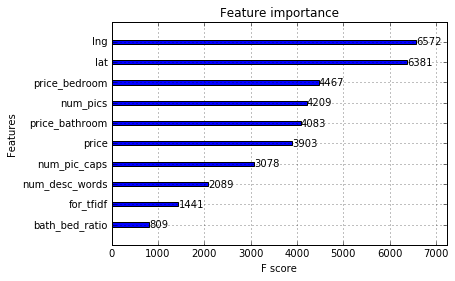

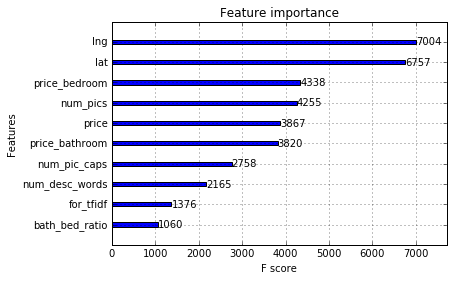

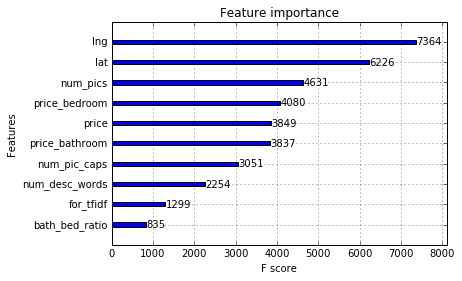

In [41]:
for i in range(3):
    # split the data set
    x_train, x_test, y_train, y_test = cv.train_test_split(data_model.drop(['id', 'star_rating'], 1), data_model['star_rating'], 
                                                      test_size = 1.0/3, random_state = i)
    
    # train the model
    print 'Starting fitting'
    params = {'objective': 'multi:softprob',
              'eta': 0.01,
              'max_depth': 5,
              'silent': 0,
              'num_class': 3,
              'min_child_weight': 2,
              'eval_metric': 'auc', # Model Accuracy is measured by the area under the ROC curve (AUC value). 
               # An area of 1 represents a perfect test; an area of .5 represents a worthless test.
              'subsample': 0.65,
              'colsample_bytree': 0.7,
              'seed': 1234,
              'nthread': 8}
    num_rounds = 1000
    early_stop_rounds = 1000

    xgtrain = xgb.DMatrix(x_train, label = y_train, missing = np.nan)
    model1 = xgb.train(params, xgtrain, num_rounds)
    print 'Done Training'
    
    # plot the variable importance plot
    print 'Round %d Variable Importance Plot:' % i
    print xgb.plot_importance(model1, max_num_features = 10)

The variable importance plot can provide information of features importance. The above plots show the top 10 features in predicting 'star_rating':   
**lng, lat, num_pics, price_bedroom, price, num_pic_caps, num_desc_words, for_tfidf, bath_bed_ratio**.  
  
This result is reasonable. Location and price play crucial roles in the 'star_rating', and description of rentals also affect customers' rating.

**What's more:**  
We also have other methods to check the importance of variables:
1. Implement LASSO regression to do feature engineering. Selected features are more important than discarded features.
2. Scale and normalize all features before regression models, and then compare the value of coefficients. Features with larger value is more important.
3. Correlation analysis between features and the label. features that have higher correlated value are very important.   

We won't implement these methods in this project due to limited time, but they are good choices to check variables importance.

### Final Note:

In this project, I focus on the methodology for handling the dataset instead of the performance of modeling. The sample dataset is too dirty and too small to give a persuasive conclusion. However, we can apply above methods to a large real world dataset. I believe there must be some invaluable insights.

# Part 3.1 - Web Scraping

'Beautiful Soup', 'Spider' and 'Selenium' are very useful in web scraping dynamic websites. In order to make sure the scraping is not blocked, we could use random sleeping time and mutiple IP agencies to avoid being identified as robots. Also, there are some smart code on github that can provide us new ideas.